<a href="https://colab.research.google.com/github/AithaDhanush/majorproject/blob/main/PQ_autoencoderfinal_ba_32_do_not_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://gist.githubusercontent.com/PrabhuKiran8790/d22641af36c185caefdce13aef66e5f7/raw/16118ef003096739bddd153e1703da82400f6833/autoencoder.py
!wget https://gist.githubusercontent.com/PrabhuKiran8790/81d8e132f407d9f3178cf8f85f3b33c4/raw/5caf34ab4f8fd3ec33c388304f3a7ef0d7fa2cd2/null_values.py
!wget https://gist.githubusercontent.com/PrabhuKiran8790/81d8e132f407d9f3178cf8f85f3b33c4/raw/c7fbe65b62f39be8155edd271fda0cd4854aa656/variance.py

--2023-03-30 06:31:49--  https://gist.githubusercontent.com/PrabhuKiran8790/d22641af36c185caefdce13aef66e5f7/raw/16118ef003096739bddd153e1703da82400f6833/autoencoder.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7004 (6.8K) [text/plain]
Saving to: ‘autoencoder.py’

autoencoder.py      100%[===================>]   6.84K  --.-KB/s    in 0s      

2023-03-30 06:31:49 (61.1 MB/s) - ‘autoencoder.py’ saved [7004/7004]

--2023-03-30 06:31:49--  https://gist.githubusercontent.com/PrabhuKiran8790/81d8e132f407d9f3178cf8f85f3b33c4/raw/5caf34ab4f8fd3ec33c388304f3a7ef0d7fa2cd2/null_values.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.gi

In [ ]:
from autoencoder import AutoEncoder
from null_values import null_values_info
from variance import variance_info
import pandas as pd
import numpy as np
from IPython.display import display

In [ ]:
import pickle

with open('/content/pq_data_preprocessing (1).pkl', 'rb') as f:
    pq_data = pickle.load(f)

In [ ]:
pq_data.keys()

dict_keys(['dataset', 'scaled_X_data_df', 'y_data', 'X_train', 'X_test', 'y_train', 'y_test', 'classes'])

In [ ]:
X_train = pq_data['X_train']
X_train

,Mean-d1,Mean-d2,Mean-d3,Mean-d4,Mean-d5,Mean-d6,Mean-d7,Mean-d8,Mean-A8,Std-d1,...,Skewness-A8,Entropy-d1,Entropy-d2,Entropy-d3,Entropy-d4,Entropy-d5,Entropy-d6,Entropy-d7,Entropy-d8,Entropy-A8
0,0.795587,0.000759,0.067266,0.007977,0.365696,0.064661,0.069091,0.220486,0.004224,0.000179,...,0.002262,0.002199,0.022079,0.075781,0.273475,0.771322,0.314076,0.209859,0.128258,0.811647
1,0.795587,0.000868,0.067355,0.008246,0.366396,0.074738,0.175206,0.161215,0.015307,0.000230,...,0.002105,0.002341,0.022048,0.076009,0.289769,0.776189,0.395430,0.209347,0.128143,0.708121
3,0.795587,0.000868,0.067355,0.008276,0.365679,0.080573,0.183441,0.172184,0.015307,0.000230,...,0.003029,0.001987,0.018045,0.080568,0.298484,0.778382,0.313831,0.209347,0.128143,0.708121
4,0.795587,0.000868,0.067355,0.008276,0.366279,0.079223,0.192151,0.286144,0.015307,0.000230,...,0.001867,0.001845,0.018107,0.080470,0.314475,0.792765,0.314076,0.209859,0.436675,0.811647
5,0.795587,0.000868,0.067355,0.008395,0.366312,0.072183,0.186247,0.229067,0.015313,0.000230,...,0.001667,0.002199,0.013919,0.083108,0.287571,0.745538,0.314076,0.209859,0.128258,0.900707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.795587,0.000759,0.067222,0.008066,0.367129,0.068470,0.085198,0.098662,0.005789,0.004593,...,0.003279,0.855055,0.878919,0.967206,0.451345,0.433721,0.761404,0.612676,0.075669,0.613677
742,0.795587,0.000759,0.067222,0.008634,0.365763,0.074738,0.025508,0.093459,0.006104,0.005741,...,0.004441,0.910500,0.898627,0.797733,0.306707,0.669283,0.546552,0.819334,0.324492,0.601184
743,0.795587,0.000759,0.067222,0.008843,0.365646,0.073533,0.109212,0.242657,0.006166,0.007016,...,0.002300,0.972473,0.977921,0.864005,0.094847,0.755054,0.383680,0.819334,0.436675,0.717080
747,0.795587,0.000759,0.067178,0.008246,0.367212,0.075365,0.081882,0.183910,0.005962,0.005103,...,0.002407,0.886839,0.900782,0.981503,0.408981,0.415216,0.570787,0.808451,0.700884,0.708244


In [ ]:
X_test = pq_data['X_test']
X_test

,Mean-d1,Mean-d2,Mean-d3,Mean-d4,Mean-d5,Mean-d6,Mean-d7,Mean-d8,Mean-A8,Std-d1,...,Skewness-A8,Entropy-d1,Entropy-d2,Entropy-d3,Entropy-d4,Entropy-d5,Entropy-d6,Entropy-d7,Entropy-d8,Entropy-A8
2,0.795587,0.000868,0.067355,0.008276,0.365796,0.078644,0.202791,0.080413,0.015307,0.000230,...,1.000000,0.002341,0.018045,0.080568,0.313263,0.778382,0.313831,0.412932,0.128143,0.708121
6,0.795587,0.000868,0.067355,0.008126,0.366096,0.077294,0.208585,0.110816,0.015307,0.000230,...,0.002288,0.002199,0.013919,0.083531,0.308791,0.783249,0.395186,0.413060,0.128258,0.708244
7,0.795587,0.000868,0.067355,0.008395,0.365746,0.081151,0.162197,0.115358,0.015307,0.000230,...,0.002891,0.002199,0.013919,0.083694,0.311709,0.778250,0.314076,0.413060,0.128258,0.601184
10,0.795587,0.000868,0.067355,0.008276,0.366013,0.074738,0.219627,0.178668,0.015313,0.000230,...,0.001920,0.002199,0.009515,0.085681,0.303903,0.764438,0.314076,0.413060,0.128258,0.900707
18,0.795587,0.000868,0.067355,0.008276,0.365579,0.081827,0.181656,0.168320,0.015307,0.000255,...,0.003261,0.002199,0.013919,0.089589,0.298181,0.771322,0.314076,0.413060,0.128258,0.708244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0.795587,0.000759,0.067178,0.008126,0.364080,0.062732,0.061730,0.234444,0.004898,0.003572,...,0.002390,0.758389,0.809386,0.904973,0.294051,0.154440,0.855324,1.000000,0.700884,0.900707
744,0.795587,0.000759,0.067178,0.007798,0.369811,0.062925,0.017892,0.312023,0.008565,0.002143,...,0.002544,0.624299,0.709183,0.766568,0.426677,0.342469,0.218686,0.808451,0.169480,0.717080
745,0.795587,0.000759,0.067178,0.007798,0.365513,0.064275,0.099920,0.157739,0.006976,0.002985,...,0.003381,0.731110,0.781487,0.844205,0.086965,0.163517,0.661281,0.598592,0.700884,0.506617
746,0.795587,0.000759,0.067178,0.008007,0.363547,0.072376,0.037352,0.124464,0.004960,0.003980,...,0.004710,0.790138,0.837993,0.937018,0.252709,0.028327,0.982456,0.598592,0.324492,0.708244


In [ ]:
y_test = pq_data['y_test']
y_test

,label
2,8
6,8
7,8
10,8
18,8
...,...
740,4
744,4
745,4
746,4


In [ ]:
y_train = pq_data['y_train']
y_train

,label
0,8
1,8
3,8
4,8
5,8
...,...
741,4
742,4
743,4
747,4


In [ ]:
y_test.to_excel('y_test_autoencoder.xlsx')
y_train.to_excel('y_train_autoencoder.xlsx')

In [ ]:
y_test.label.unique()

array([ 8,  5,  3,  6,  0, 12,  7,  1, 10, 11,  9,  2,  4])

In [ ]:
in_features = X_train.shape[1]

in_features

72

In [ ]:
fifty_percent_ls = int(in_features - in_features*0.05)
fifty_percent_ls

68

In [ ]:
latent_spaces = [int(in_features - i/100*in_features) for i in range(10, 81, 10)]
latent_spaces

[64, 57, 50, 43, 36, 28, 21, 14]

In [ ]:
latent_spaces.insert(0, fifty_percent_ls)

In [ ]:
latent_spaces

[68, 64, 57, 50, 43, 36, 28, 21, 14]

Model: "AutoEncoder_LS_68_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 latent_space (Dense)        (None, 68)                4760      
                                                                 
 decoder_layer1 (Dense)      (None, 69)                4761      
                                                                 
 decoder_layer2 (Dense)      (None, 70)    

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68
0,1.115766,0.0,0.404367,2.511976,0.288271,0.000000,1.758663,0.0,0.146670,1.951269,...,0.0,1.302946,1.874910,1.037712,0.000000,0.963862,0.0,1.566290,2.271512,0.0
1,1.255980,0.0,0.346552,1.888302,0.537841,0.000000,1.862458,0.0,0.690747,2.097515,...,0.0,0.969685,1.832827,0.666084,0.000000,0.607128,0.0,1.562553,2.178651,0.0
2,1.202127,0.0,0.391341,2.048905,0.535865,0.000000,1.874146,0.0,0.641303,2.003269,...,0.0,0.973802,1.895769,0.587368,0.000000,0.689010,0.0,1.527045,2.243818,0.0
3,1.137039,0.0,0.161925,1.778105,0.221351,0.000000,1.885312,0.0,1.232939,2.066290,...,0.0,1.034513,2.004440,0.351635,0.000000,0.713505,0.0,1.510768,2.457886,0.0
4,1.239145,0.0,0.237167,1.939344,0.570603,0.000000,1.996127,0.0,0.743035,1.999709,...,0.0,0.823690,1.831409,0.482711,0.000000,0.642213,0.0,1.564559,2.297904,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,1.208305,0.0,0.000000,0.989518,2.657987,1.917460,1.131865,0.0,0.000000,0.478107,...,0.0,0.328620,0.329932,0.562492,1.893261,0.851949,0.0,0.415762,0.000000,0.0
498,1.002016,0.0,0.641658,0.797066,2.584105,1.726866,0.991975,0.0,0.000000,0.700685,...,0.0,0.361879,0.685937,0.382052,1.935687,0.415327,0.0,0.379968,0.000000,0.0
499,0.972895,0.0,1.394326,0.475395,2.897777,1.719043,0.841498,0.0,0.000000,0.769515,...,0.0,0.259213,1.177699,0.210994,2.089209,0.075294,0.0,0.325240,0.000000,0.0
500,1.063565,0.0,0.000000,0.634528,2.174470,2.059729,0.955875,0.0,0.000000,0.478800,...,0.0,0.497238,0.500475,0.087424,1.976109,0.767981,0.0,0.075383,0.000000,0.0


8/8 [==============================] - 0s 2ms/step
68
22.05802110132485
Model: "AutoEncoder_LS_64_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                     

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,4.399055,0.0,0.431775,0.0,3.815948,0.0,2.194578,0.123619,1.082151,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.934973,0.491328,2.183828,0.000000,0.0
1,4.330547,0.0,0.453271,0.0,4.068313,0.0,2.162574,0.000000,1.173561,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.022678,0.228345,1.951855,0.000000,0.0
2,4.330493,0.0,0.446618,0.0,3.954539,0.0,2.169183,0.000000,1.130225,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.006942,0.286878,2.008168,0.000000,0.0
3,4.168658,0.0,0.423032,0.0,4.046705,0.0,2.114304,0.000000,1.197197,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.124194,0.000000,1.717343,0.000000,0.0
4,4.329368,0.0,0.449784,0.0,4.048847,0.0,2.172367,0.000000,1.165659,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.040049,0.208978,1.938635,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,1.662490,0.0,0.207496,0.0,1.995307,0.0,0.731144,0.246341,0.371707,0.0,...,0.0,0.0,0.128316,0.0,0.0,0.000000,1.108358,0.000000,0.000000,0.0
498,1.508404,0.0,0.186414,0.0,2.204531,0.0,0.584111,0.065862,0.395455,0.0,...,0.0,0.0,0.694541,0.0,0.0,0.000000,0.924732,0.000000,0.000000,0.0
499,1.397689,0.0,0.155394,0.0,2.520795,0.0,0.397895,0.018506,0.497224,0.0,...,0.0,0.0,1.315823,0.0,0.0,0.000000,0.818265,0.000000,0.162619,0.0
500,1.118231,0.0,0.166303,0.0,1.537709,0.0,0.455647,0.188627,0.272887,0.0,...,0.0,0.0,0.401324,0.0,0.0,0.000000,0.818922,0.000000,0.050197,0.0


8/8 [==============================] - 0s 2ms/step
64
23.68515143516119
Model: "AutoEncoder_LS_57_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                     

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.0,4.980779,0.0,5.907628,0.0,0.0,0.178318,0.0,0.0,0.0,...,0.0,0.0,20.503155,0.0,9.079804,5.542241,0.0,0.0,5.157815,0.0
1,0.0,5.206294,0.0,6.173499,0.0,0.0,0.188354,0.0,0.0,0.0,...,0.0,0.0,21.426498,0.0,9.488370,5.790940,0.0,0.0,5.390182,0.0
2,0.0,5.177669,0.0,6.139744,0.0,0.0,0.187074,0.0,0.0,0.0,...,0.0,0.0,21.309282,0.0,9.436499,5.759364,0.0,0.0,5.360690,0.0
3,0.0,4.848293,0.0,5.751249,0.0,0.0,0.172384,0.0,0.0,0.0,...,0.0,0.0,19.960554,0.0,8.839596,5.395993,0.0,0.0,5.021140,0.0
4,0.0,5.171452,0.0,6.132530,0.0,0.0,0.186835,0.0,0.0,0.0,...,0.0,0.0,21.283924,0.0,9.425373,5.752606,0.0,0.0,5.354356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,0.243564,0.0,0.321273,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.104115,0.0,0.491074,0.313618,0.0,0.0,0.275467,0.0
498,0.0,0.215921,0.0,0.288776,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.990772,0.0,0.440894,0.283057,0.0,0.0,0.247099,0.0
499,0.0,0.187569,0.0,0.255476,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.874574,0.0,0.389486,0.251746,0.0,0.0,0.218004,0.0
500,0.0,0.220185,0.0,0.293745,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.008207,0.0,0.448602,0.287726,0.0,0.0,0.251417,0.0


8/8 [==============================] - 0s 2ms/step
57
214.71287254334257
Model: "AutoEncoder_LS_50_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                    

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,0.0,2.763125,1.000359,0.0,0.0,0.0,0.0,2.989582,0.0,0.0,...,0.0,0.0,5.751917,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.653098,0.963181,0.0,0.0,0.0,0.0,2.871084,0.0,0.0,...,0.0,0.0,5.522793,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.711779,0.983009,0.0,0.0,0.0,0.0,2.934283,0.0,0.0,...,0.0,0.0,5.644993,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.551312,0.928788,0.0,0.0,0.0,0.0,2.761461,0.0,0.0,...,0.0,0.0,5.310828,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.553309,0.929463,0.0,0.0,0.0,0.0,2.763612,0.0,0.0,...,0.0,0.0,5.314988,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,11.142680,3.831753,0.0,0.0,0.0,0.0,12.014253,0.0,0.0,...,0.0,0.0,23.201864,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,11.676248,4.012042,0.0,0.0,0.0,0.0,12.588897,0.0,0.0,...,0.0,0.0,24.312990,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,12.676029,4.349863,0.0,0.0,0.0,0.0,13.665648,0.0,0.0,...,0.0,0.0,26.394981,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,0.0,11.910823,4.091303,0.0,0.0,0.0,0.0,12.841531,0.0,0.0,...,0.0,0.0,24.801476,0.0,0.0,0.0,0.0,0.0,0.0,0.0


8/8 [==============================] - 0s 4ms/step
50
11950.621216212548
Model: "AutoEncoder_LS_43_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                    

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43
0,0.0,0.006537,0.025651,0.022544,0.0,0.020456,0.0,0.036100,0.0,0.062535,...,0.039712,0.0,0.0,0.0,0.041035,0.019298,0.0,0.0,0.036643,0.030270
1,0.0,0.006537,0.025648,0.022547,0.0,0.020459,0.0,0.036101,0.0,0.062537,...,0.039712,0.0,0.0,0.0,0.041039,0.019301,0.0,0.0,0.036643,0.030269
2,0.0,0.006537,0.025650,0.022545,0.0,0.020458,0.0,0.036101,0.0,0.062536,...,0.039712,0.0,0.0,0.0,0.041037,0.019300,0.0,0.0,0.036643,0.030269
3,0.0,0.006537,0.025650,0.022545,0.0,0.020457,0.0,0.036100,0.0,0.062536,...,0.039712,0.0,0.0,0.0,0.041037,0.019299,0.0,0.0,0.036643,0.030269
4,0.0,0.006537,0.025648,0.022547,0.0,0.020459,0.0,0.036101,0.0,0.062537,...,0.039712,0.0,0.0,0.0,0.041039,0.019302,0.0,0.0,0.036643,0.030269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,0.006537,0.025654,0.022539,0.0,0.020452,0.0,0.036098,0.0,0.062532,...,0.039711,0.0,0.0,0.0,0.041030,0.019294,0.0,0.0,0.036642,0.030270
498,0.0,0.006537,0.025653,0.022541,0.0,0.020453,0.0,0.036099,0.0,0.062534,...,0.039711,0.0,0.0,0.0,0.041031,0.019296,0.0,0.0,0.036643,0.030271
499,0.0,0.006537,0.025653,0.022541,0.0,0.020453,0.0,0.036099,0.0,0.062534,...,0.039711,0.0,0.0,0.0,0.041032,0.019296,0.0,0.0,0.036643,0.030271
500,0.0,0.006537,0.025654,0.022540,0.0,0.020452,0.0,0.036098,0.0,0.062533,...,0.039711,0.0,0.0,0.0,0.041030,0.019294,0.0,0.0,0.036642,0.030271


8/8 [==============================] - 0s 3ms/step
43
1.3386046213850962e-10
Model: "AutoEncoder_LS_36_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003358,...,0.0,0.001705,0.0,0.0,0.0,0.0,0.003644,0.0,0.002324,0.0


8/8 [==============================] - 0s 3ms/step
36
1.6272910080218412e-16
Model: "AutoEncoder_LS_28_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28
0,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
1,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
2,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
3,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
4,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
498,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
499,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043
500,0.0,0.002936,0.0,0.0,0.0,0.024076,0.020771,0.0,0.0,0.0,...,0.002095,0.0,0.0,0.0,0.0,0.0,0.014028,0.0,0.0,0.009043


8/8 [==============================] - 1s 3ms/step
28
1.7625323402628937e-15
Model: "AutoEncoder_LS_21_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
0,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
1,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
2,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
3,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
4,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
498,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
499,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691
500,0.0,0.0,0.0,0.0,0.0,0.000506,0.000823,0.000219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.000691


8/8 [==============================] - 1s 4ms/step
21
6.038639850859279e-23
Model: "AutoEncoder_LS_14_BS_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 72)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 71)                5183      
                                                                 
 encoder_layer2 (Dense)      (None, 70)                5040      
                                                                 
 encoder_layer3 (Dense)      (None, 69)                4899      
                                                                 
 encoder_layer4 (Dense)      (None, 68)                4760      
                                                                 
 encoder_layer5 (Dense)      (None, 67)                4623      
                                 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


8/8 [==============================] - 1s 4ms/step
14
0.0


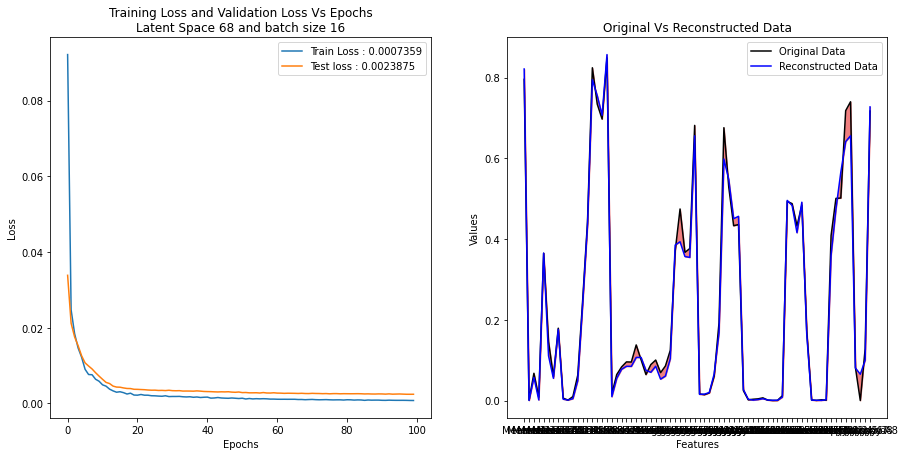

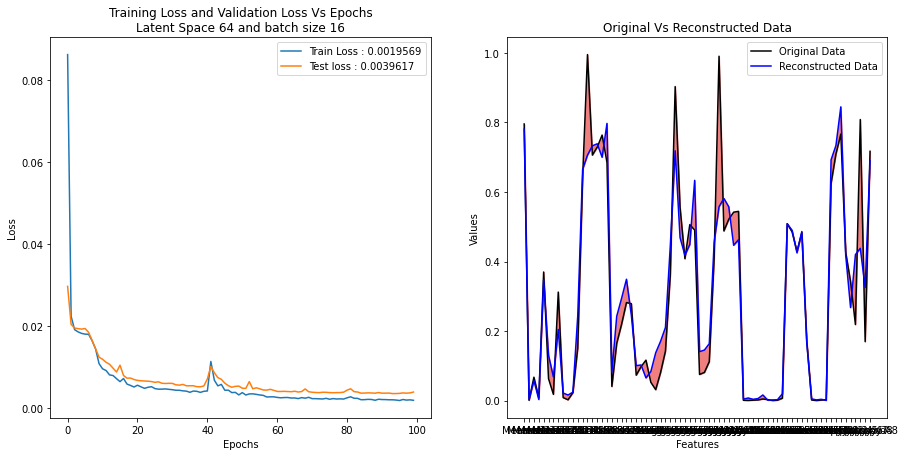

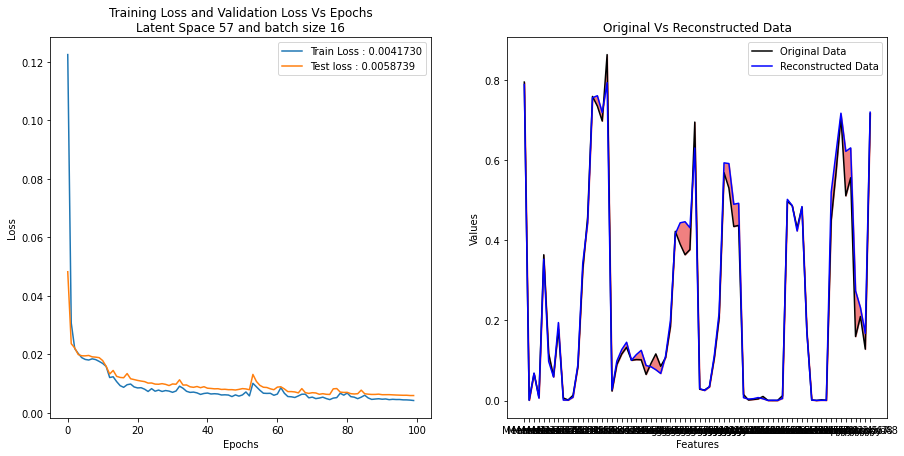

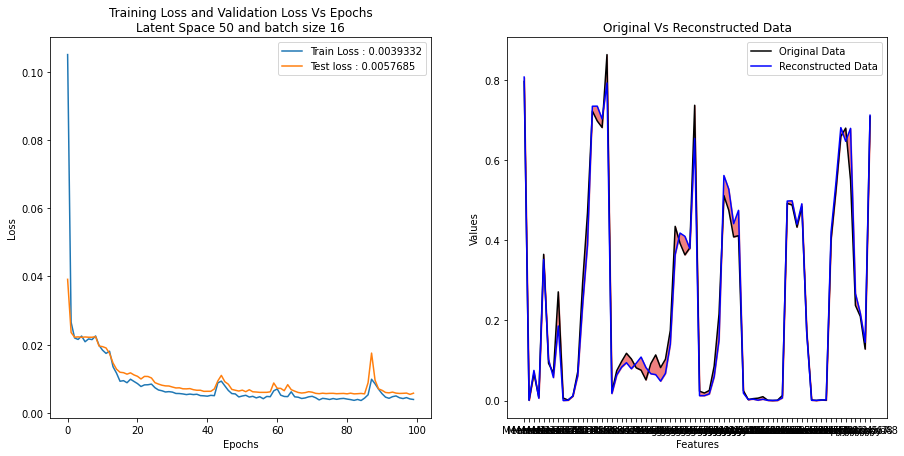

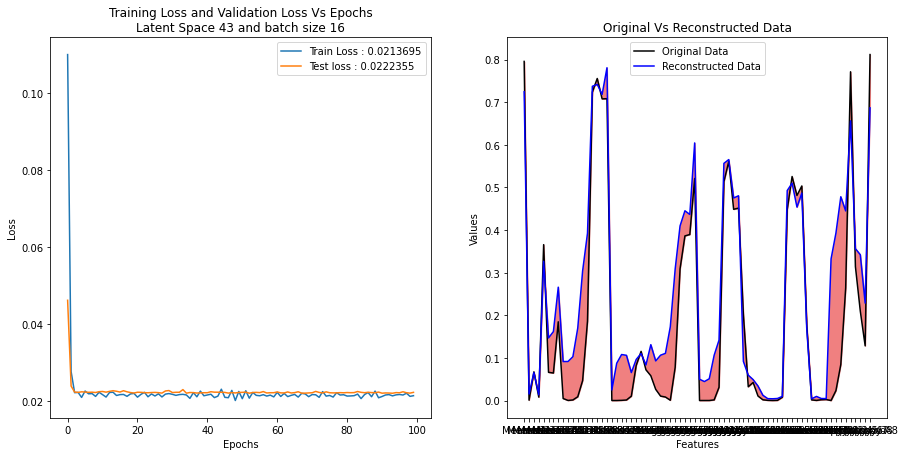

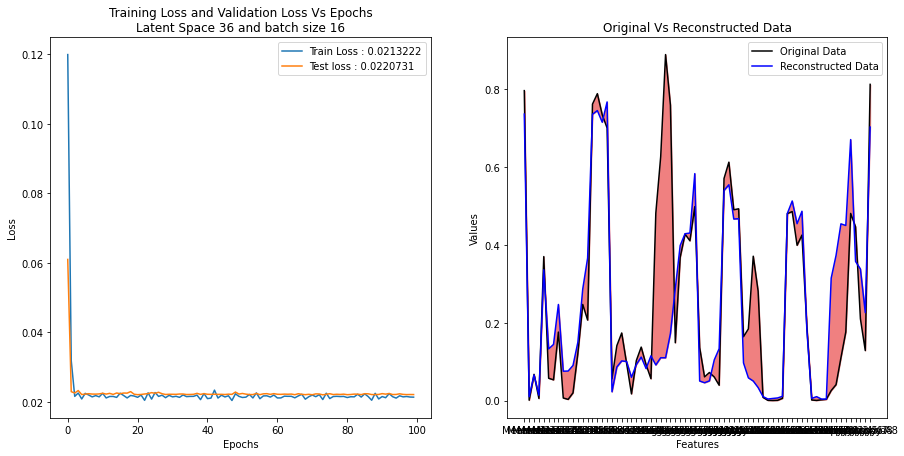

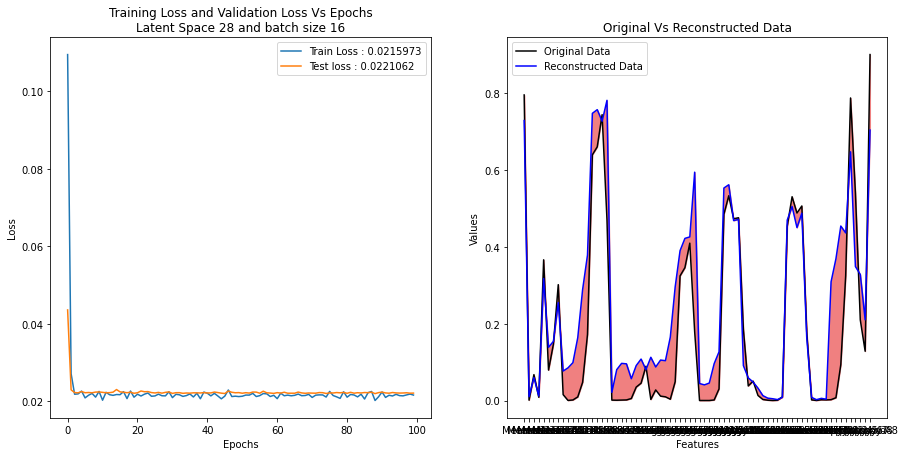

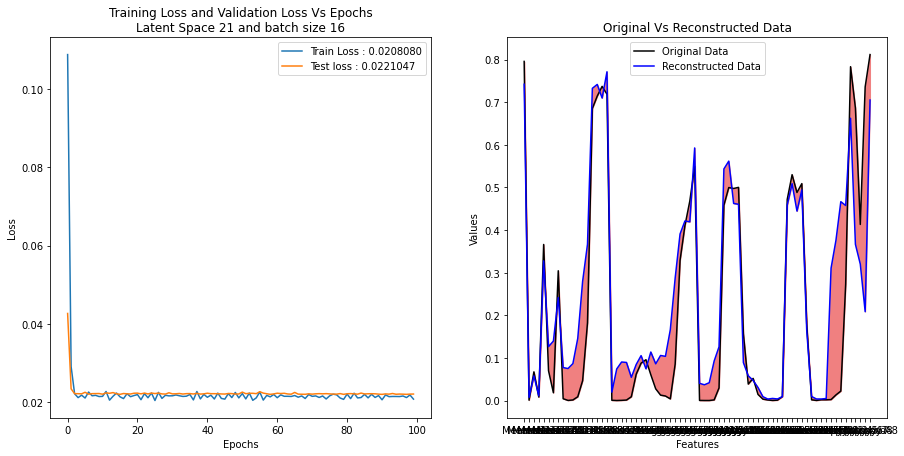

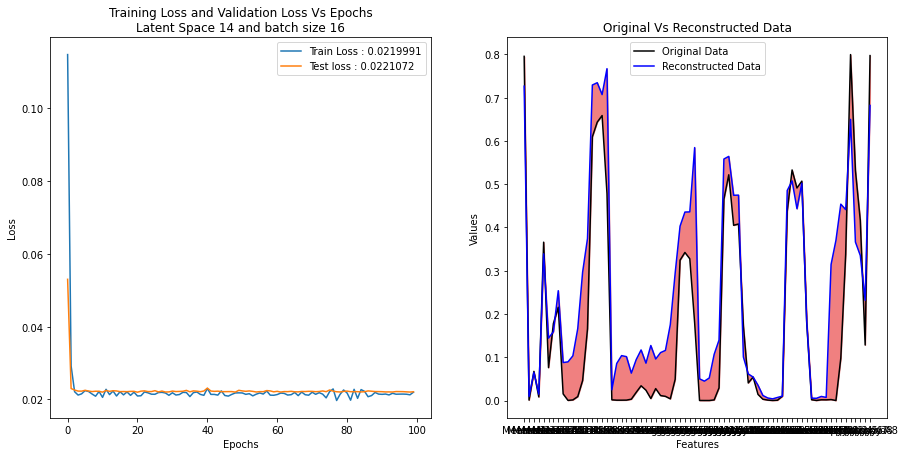

In [ ]:
for ls in latent_spaces:
    auto_encoder = AutoEncoder(in_features=in_features,
                        latent_space=ls,
                        X_train=X_train,
                        X_test=X_test,
                        batch_size=16)

    auto_encoder.build_model()
    auto_encoder.fit(epochs=100)
    auto_encoder.visualize()

    test_path = f"/content/exported_data/latent_space_{ls}_batch_16/compressed_data_test_ls{ls}_bs_16.csv"
    train_path = f"/content/exported_data/latent_space_{ls}_batch_16/compressed_data_train_ls{ls}_bs_16.csv"
    
    null_val_df = null_values_info(train_path, test_path)
    null_val_df.to_excel(f"/content/exported_data/latent_space_{ls}_batch_16/null_val_data_ls_{ls}.xlsx")


    var_info_df = variance_info(train_path, test_path)['variance_df']
    var_info_df.to_excel(f"/content/exported_data/latent_space_{ls}_batch_16/var_info_data_ls_{ls}.xlsx")

In [ ]:
!zip -r exported_data_pq.zip "/content/exported_data" -q